In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

C:\Users\Subham\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



### Data Dictionary

Variable-	Definition

ID- 	Unique Identifier for a row

City_Code- 	Code for the City of the customers

Region_Code- 	Code for the Region of the customers

Accomodation_Type- 	Customer Owns or Rents the house

Reco_Insurance_Type- 	Joint or Individual type for the recommended insurance  

Upper_Age- 	Maximum age of the customer 

Lower _Age- 	Minimum age of the customer

Is_Spouse- 	If the customers are married to each other (in case of joint insurance) 

Health_Indicator- Encoded values for health of the customer

Holding_Policy_Duration- 	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)

Holding_Policy_Type- Type of holding policy

Reco_Policy_Cat- 	Encoded value for recommended health insurance

Reco_Policy_Premium- 	Annual Premium (INR) for the recommended health insurance 

Response (Target) 	0 : Customer did not show interest in the recommended policy 1 : Customer showed interest in the recommended policy

In [106]:
train = pd.read_csv('train.csv')
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [108]:
train['Response'] = train['Response'].astype(int)

In [109]:
TEST = pd.read_csv('test.csv')
TEST.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [110]:
TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


## Merging test and train data

*Temporarily for feature engineering and dealing with missing data**

In [111]:
data = pd.concat((TEST,train),ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         55969 non-null  object 
 9   Holding_Policy_Duration  43833 non-null  object 
 10  Holding_Policy_Type      43833 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
dtypes: float64(3), int64(5

In [112]:
## Finding the index from where the training data is starting
data['Response'].isnull().value_counts()

False    50882
True     21805
Name: Response, dtype: int64

##### Sample submission

In [9]:
sample = pd.read_csv('sample_sub.csv')
sample.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


### Few Modifications

In [113]:
data['Holding_Policy_Duration'].replace(to_replace='14+', value='15', inplace=True)

In [114]:
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].astype(float)

### Handling NaN

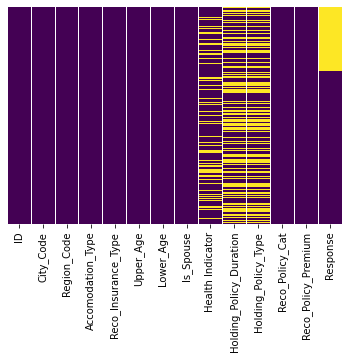

In [12]:
# Missing Data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [115]:
train[train['Holding_Policy_Type'].isna()]['Response'].value_counts()

0    15412
1     4839
Name: Response, dtype: int64

##### Observation
1. Holding_Policy_Duration	& Holding_Policy_Type are null together. The reason is that they have no policy.
2. Many people have no prexisting health issues
3. 15412 Rows are there with NaN values of which 4839 i.e 1/3rd are positive responses. So this can't be ignored and assigned value 0

In [116]:
data['Health Indicator'].fillna('X0', inplace=True)

In [117]:
data['Holding_Policy_Duration'].fillna(0, inplace=True)
data['Holding_Policy_Type'].fillna(0, inplace=True)

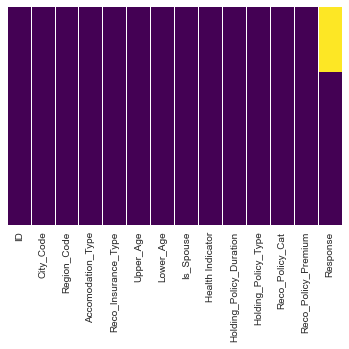

In [118]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EDA

In [17]:
## They are not related
train[['Reco_Insurance_Type','Is_Spouse']]

,Reco_Insurance_Type,Is_Spouse
0,Individual,No
1,Joint,No
2,Individual,No
3,Joint,No
4,Individual,No
...,...,...
50877,Individual,No
50878,Individual,No
50879,Individual,No
50880,Joint,No


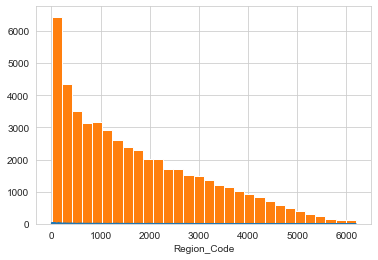

In [101]:

train['Region_Code'].hist(bins=30)

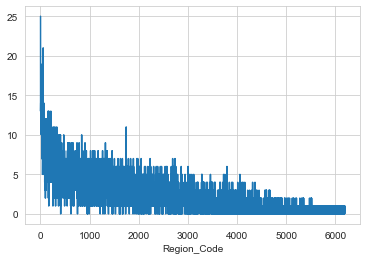

In [102]:
train.groupby('Region_Code').sum()['Response'].plot()

Region code is increasing with decreasing population and count

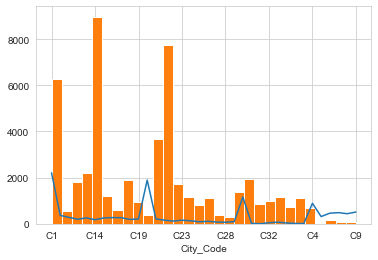

In [100]:
train.groupby('City_Code').sum()['Response'].plot()
train['City_Code'].hist(bins=30)

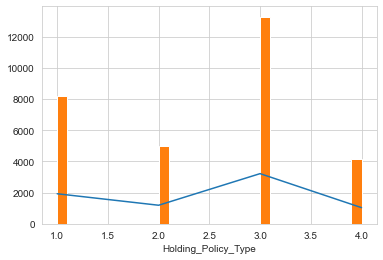

In [99]:
train.groupby('Holding_Policy_Type').sum()['Response'].plot()
train['Holding_Policy_Type'].hist(bins=30)

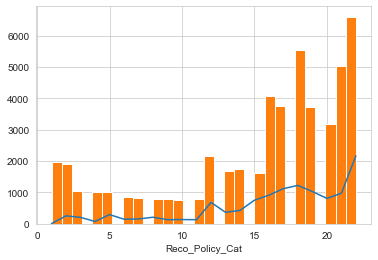

In [98]:
train.groupby('Reco_Policy_Cat').sum()['Response'].plot()
train['Reco_Policy_Cat'].hist(bins=30)

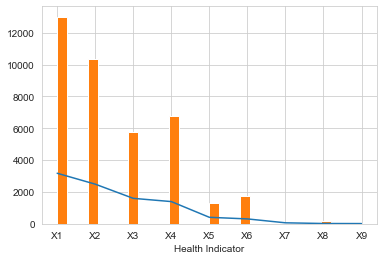

In [97]:
train.groupby('Health Indicator').sum()['Response'].plot()
train['Health Indicator'].hist(bins=30)

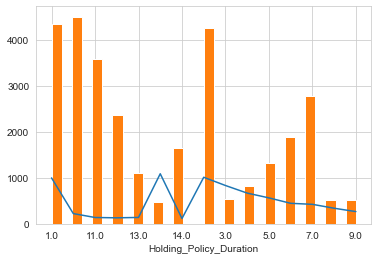

In [96]:
train.groupby('Holding_Policy_Duration').sum()['Response'].plot()
train['Holding_Policy_Duration'].hist(bins=30)

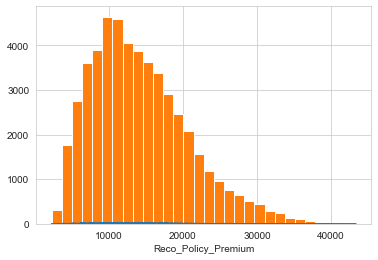

In [92]:
train.groupby('Reco_Policy_Premium').sum()['Response'].plot()
train['Reco_Policy_Premium'].hist(bins=30)

C:\Users\Subham\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Subham\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



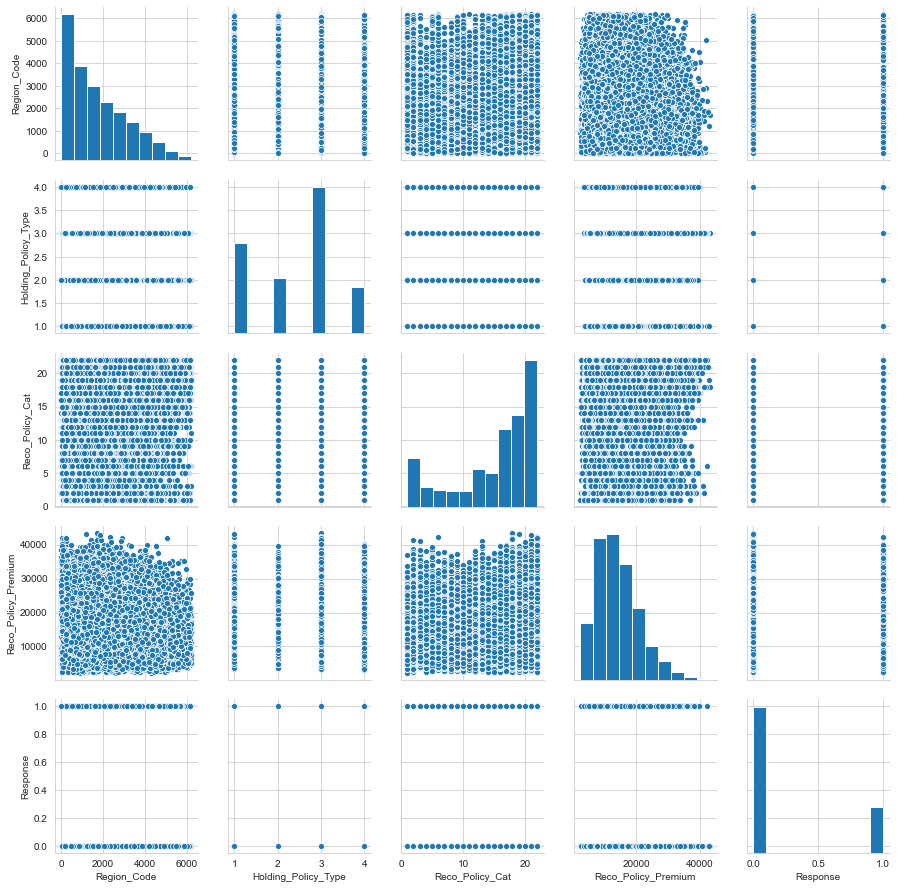

In [95]:
sns.pairplot(train[['City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type','Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']])

Text(0.5, 0, 'Age')

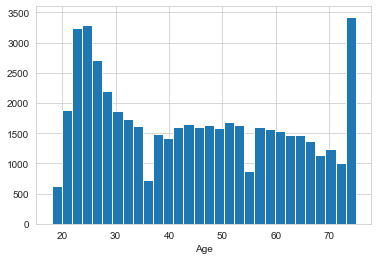

In [25]:
sns.set_style('whitegrid')
train['Upper_Age'].hist(bins=30)
plt.xlabel('Age')

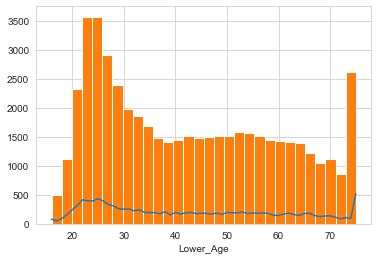

In [91]:
train.groupby('Lower_Age').sum()['Response'].plot()
train['Lower_Age'].hist(bins=30)

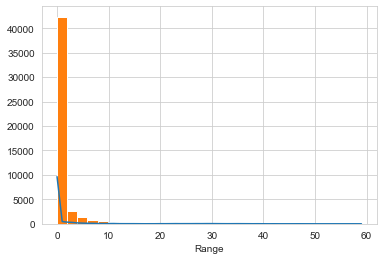

In [103]:
train['Range'] = train['Upper_Age'] - train['Lower_Age']
train.groupby('Range').sum()['Response'].plot()
train['Range'].hist(bins=30)

In [156]:
## Range is redundant and correative
### Consider only one age as it is correlative

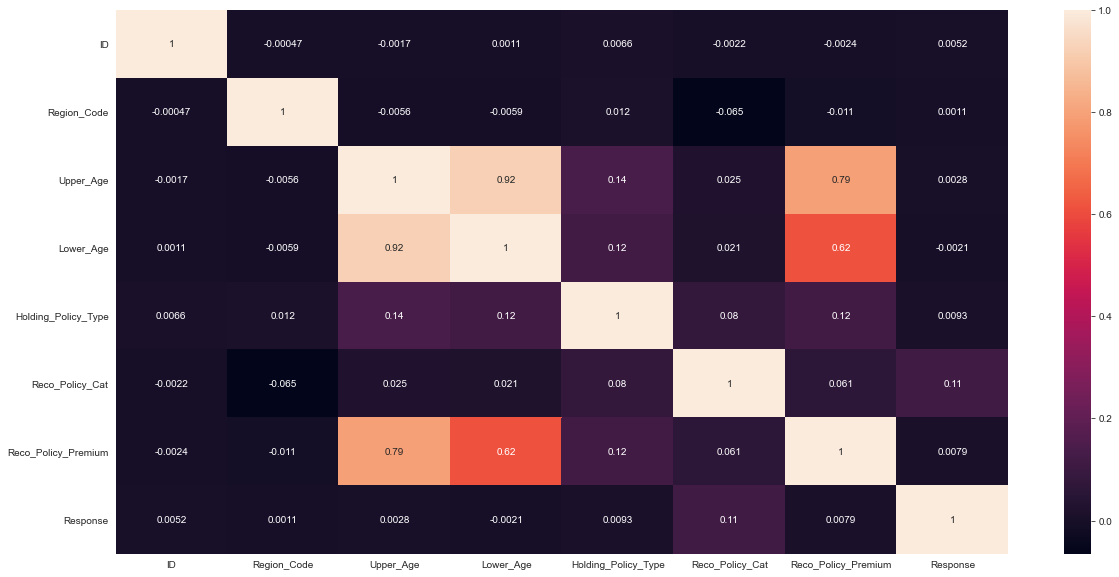

In [119]:

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train.corr(),annot = True)
plt.show()

In [29]:
# data['Range'] = data['Upper_Age'] - data['Lower_Age']
# data['Range'] = data['Range'].apply(lambda x: 1 if x<9 else 0)

## Inserting Dummies, Removing Redundants & Scaling

In [120]:
Reco_Insurance_Type = pd.get_dummies(data['Reco_Insurance_Type'],drop_first=True) # If one is true the other is definitely false  
Is_Spouse = pd.get_dummies(data['Is_Spouse'],drop_first=True)
City_Code = pd.get_dummies(data['City_Code'],drop_first=False)
Accomodation_Type = pd.get_dummies(data['Accomodation_Type'],drop_first=True)
Health_Indicator = pd.get_dummies(data['Health Indicator'],drop_first=True)
Holding_Policy_Type = pd.get_dummies(data['Holding_Policy_Type'],drop_first=False)
Reco_Policy_Cat = pd.get_dummies(data['Reco_Policy_Cat'],drop_first=True)
# Region_Code = pd.get_dummies(data['Region_Code'],drop_first=False)

In [121]:
data.drop(['Reco_Insurance_Type','Is_Spouse','City_Code','Accomodation_Type','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat','Lower_Age'],axis=1,inplace=True)

In [122]:
data = pd.concat([data,Reco_Insurance_Type,Is_Spouse,City_Code,Accomodation_Type,Health_Indicator,Holding_Policy_Type,Reco_Policy_Cat],axis=1)

In [124]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Region_Code','Upper_Age','Holding_Policy_Duration','Reco_Policy_Premium']]=scaler.fit_transform(data[['Region_Code','Upper_Age','Holding_Policy_Duration','Reco_Policy_Premium']])


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   Region_Code              72687 non-null  float64
 2   Upper_Age                72687 non-null  float64
 3   Lower_Age                72687 non-null  float64
 4   Holding_Policy_Duration  72687 non-null  float64
 5   Reco_Policy_Premium      72687 non-null  float64
 6   Response                 50882 non-null  float64
 7   Joint                    72687 non-null  uint8  
 8   Yes                      72687 non-null  uint8  
 9   C1                       72687 non-null  uint8  
 10  C10                      72687 non-null  uint8  
 11  C11                      72687 non-null  uint8  
 12  C12                      72687 non-null  uint8  
 13  C13                      72687 non-null  uint8  
 14  C14                   

### Un-merging to train and test set 

In [126]:
ftrain=data.loc[data.index>=21805].copy()
ftest=data.loc[data.index<21805].copy()

In [127]:
ftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 21804
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   Region_Code              21805 non-null  float64
 2   Upper_Age                21805 non-null  float64
 3   Lower_Age                21805 non-null  float64
 4   Holding_Policy_Duration  21805 non-null  float64
 5   Reco_Policy_Premium      21805 non-null  float64
 6   Response                 0 non-null      float64
 7   Joint                    21805 non-null  uint8  
 8   Yes                      21805 non-null  uint8  
 9   C1                       21805 non-null  uint8  
 10  C10                      21805 non-null  uint8  
 11  C11                      21805 non-null  uint8  
 12  C12                      21805 non-null  uint8  
 13  C13                      21805 non-null  uint8  
 14  C14                   

In [128]:
ftrain['Response'] = ftrain['Response'].astype(int)

In [129]:
ftrain.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,Response,Joint,Yes,C1,...,13,14,15,16,17,18,19,20,21,22
21805,1,1.032938,-0.512490,-0.389598,2.364254,-0.391139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21806,2,-0.434460,1.742700,-1.198656,-0.779560,2.486110,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
21807,3,1.396287,-0.743791,-0.620757,-0.569973,-1.027785,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21808,4,1.848548,0.412716,0.303880,2.364254,0.546306,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
21809,5,0.316742,-0.049887,0.072721,-0.150797,-0.577653,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Making Train-Test-Validation sets 30%

In [130]:
from sklearn.model_selection import train_test_split
X=ftrain.drop('Response',axis=1)
y=ftrain['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108)

# Applying ML Models
### 1. Linear Regression

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
# Prediction
predictions = logmodel.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     11656
           1       0.00      0.00      0.00      3609

    accuracy                           0.76     15265
   macro avg       0.38      0.50      0.43     15265
weighted avg       0.58      0.76      0.66     15265



C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [46]:
print(confusion_matrix(y_test,predictions))

[[11656     0]
 [ 3609     0]]


In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    
    error_rate.append(np.mean(prediction != y_test))

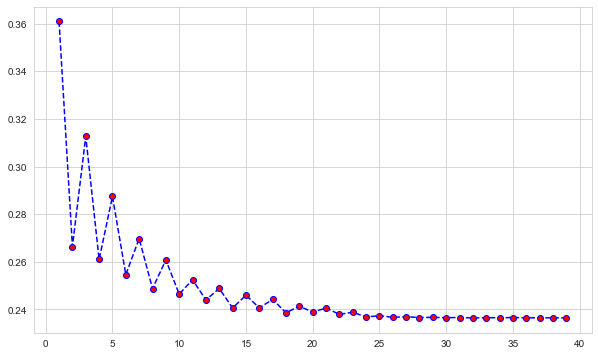

In [149]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, 'b--',marker='o',markerfacecolor='red')

In [155]:
# Taking K=30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[11653     3]
 [ 3608     1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     11656
           1       0.25      0.00      0.00      3609

    accuracy                           0.76     15265
   macro avg       0.51      0.50      0.43     15265
weighted avg       0.64      0.76      0.66     15265



In [49]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtree=DecisionTreeClassifier()

In [139]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
predicted = dtree.predict(X_test)

In [141]:
print(confusion_matrix(y_test,predicted))

[[9000 2656]
 [2476 1133]]


In [82]:
ftest.drop(columns=['Response'])

,ID,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,Range,Joint,Yes,C1,C10,...,6182,6183,6184,6185,6187,6188,6189,6191,6193,6194
0,50883,-0.859442,-0.736337,0.477965,-0.344510,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50884,1.395748,1.459677,-0.150797,2.744364,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50885,-0.975093,-0.851917,-0.360385,-0.755023,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,50886,-1.264220,-1.140866,-0.150797,-0.778490,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50887,1.742700,1.864206,-0.779560,1.270723,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,0.007939,0.130511,0.058790,0.257393,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21801,72684,0.817494,0.939569,0.477965,1.096400,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21802,72685,1.684875,1.806417,-0.779560,0.554839,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21803,72686,-1.148569,-1.025286,-0.150797,-0.400282,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
pdt = dtree.predict(ftest.drop(columns=['Response']))

In [84]:
Sub1 = TEST[['ID']]
Sub1

,ID
0,50883
1,50884
2,50885
3,50886
4,50887
...,...
21800,72683
21801,72684
21802,72685
21803,72686


In [85]:
Sub1['Response'] = pd.DataFrame(pdt, columns=['Response'])
Sub1

,ID,Response
0,50883,0
1,50884,1
2,50885,1
3,50886,0
4,50887,1
...,...,...
21800,72683,0
21801,72684,1
21802,72685,0
21803,72686,0


In [88]:
Sub1.to_csv("Sub1.csv",index = False)

In [89]:
pd.read_csv("Sub1.csv")

,ID,Response
0,50883,0
1,50884,1
2,50885,1
3,50886,0
4,50887,1
...,...,...
21800,72683,0
21801,72684,1
21802,72685,0
21803,72686,0


In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfc = RandomForestClassifier(n_estimators=100)  # No. of trees used to train

In [144]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
pred = rfc.predict(X_test)

In [146]:
print(confusion_matrix(y_test,pred))

[[11418   238]
 [ 3396   213]]


In [ ]:
# from sklearn.svm import SVC

In [ ]:
# model = SVC()

In [ ]:
# model.fit(X_train,y_train)

In [ ]:
# pred = model.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test,pred))